In [1]:
import pandas as pd

# Read collision data
collision_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-10/collision_data_0.5.xlsx", header=0, names=["time", "type", "lane", "pos", "collider", "victim", "colliderType", "victimType", "colliderSpeed", "victimSpeed"])

# Read FCD data
fcd_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-10/fcd_data_0.5.xlsx")



In [4]:
collision_df

,time,type,lane,pos,collider,victim,colliderType,victimType,colliderSpeed,victimSpeed
0,21.5,collision,-E4_1,81.38,EGOVEHICLE,f_4.4,EGOVEHICLE,DEFAULTVEHCILE,24.24,21.34


In [2]:
import pandas as pd
import numpy as np

# Assuming 'fcd_df' is your DataFrame

# Group the DataFrame by 'time' and 'lane'
grouped = fcd_df.groupby(['time', 'lane'])

# Create empty columns to store nearest vehicle ID, least distance, and relative speed
fcd_df['nearest_vehicle_id'] = "0"
fcd_df['least_distance'] = 0.0
fcd_df['relative_speed'] = 0.0

for name, group in grouped:
    for index, row in group.iterrows():
        id_pos = row['position']
        id_speed = row['speed']
        other_vehicles = group[group['vehicle_id'] != row['vehicle_id']]  # Excluding the same id from comparison

        # Calculate distance to other vehicles
        other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
        
        if not other_vehicles.empty:
            # Find the row of the nearest vehicle
            min_distance_row = other_vehicles.loc[other_vehicles['distance_to_' + str(row['vehicle_id'])].idxmin()]
            fcd_df.at[index, 'nearest_vehicle_id'] = min_distance_row['vehicle_id']
            fcd_df.at[index, 'least_distance'] = min_distance_row['distance_to_' + str(row['vehicle_id'])]

            # Calculate relative speed
            nearest_vehicle_speed = min_distance_row['speed']
            relative_speed = abs(id_speed - nearest_vehicle_speed)
            fcd_df.at[index, 'relative_speed'] = relative_speed

# Display the updated DataFrame with the columns for nearest 'id', least distance, and relative speed
print(fcd_df)


C:\Users\saiko\AppData\Local\Temp\ipykernel_44468\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_44468\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_44468\314542615.py:21: SettingWithCopyWarnin

C:\Users\saiko\AppData\Local\Temp\ipykernel_44468\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_44468\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_44468\314542615.py:21: SettingWithCopyWarnin

      time  vehicle_id       x      y   angle            type  speed  \
0      0.0  EGOVEHICLE  394.90   4.80  270.00      EGOVEHICLE   0.00   
1      0.0       f_0.0  -44.95  -4.80   90.00  DEFAULTVEHCILE   0.00   
2      0.0       f_1.0  -58.21 -39.46   33.37  DEFAULTVEHCILE   0.00   
3      0.0       f_2.0  -43.55  -1.60   90.00  DEFAULTVEHCILE   0.00   
4      0.0       f_3.0  362.15   1.60  270.00  DEFAULTVEHCILE   0.00   
...    ...         ...     ...    ...     ...             ...    ...   
2069  29.0       f_5.5  104.61   8.00  270.00  DEFAULTVEHCILE  22.35   
2070  29.0       f_5.6  256.73   4.80  270.00  DEFAULTVEHCILE  23.21   
2071  29.0       f_5.7  235.26   4.80  270.00  DEFAULTVEHCILE  24.05   
2072  29.0       f_5.8  355.70   4.80  270.00  DEFAULTVEHCILE   4.32   
2073  29.0       f_5.9  336.96   1.60  270.00  DEFAULTVEHCILE  13.31   

      position   lane  slope  acceleration nearest_vehicle_id  least_distance  \
0         5.10  -E2_0      0          0.00            

In [3]:
# Sorting the DataFrame by the 'id' column
sorted_data = fcd_df.sort_values(by=['vehicle_id','time'])

In [5]:
final_data = sorted_data[(sorted_data['vehicle_id'] == 'EGOVEHICLE') & (sorted_data['time'] <= 21.4)]

In [6]:
final_data

,time,vehicle_id,x,y,angle,type,speed,position,lane,slope,acceleration,nearest_vehicle_id,least_distance,relative_speed
0,0.0,EGOVEHICLE,394.90,4.8,270.0,EGOVEHICLE,0.00,5.10,-E2_0,0,0.00,f_5.0,65.11,0.00
7,0.5,EGOVEHICLE,394.67,4.8,270.0,EGOVEHICLE,0.45,5.33,-E2_0,0,0.90,f_5.0,65.80,1.38
14,1.0,EGOVEHICLE,393.30,4.8,270.0,EGOVEHICLE,2.74,6.70,-E2_0,0,4.58,f_5.1,58.17,2.74
25,1.5,EGOVEHICLE,390.46,4.8,270.0,EGOVEHICLE,5.69,9.54,-E2_0,0,5.90,f_5.1,55.93,4.48
37,2.0,EGOVEHICLE,385.76,4.8,270.0,EGOVEHICLE,9.40,14.24,-E2_0,0,7.40,f_5.1,52.67,6.52
53,2.5,EGOVEHICLE,378.83,4.8,270.0,EGOVEHICLE,13.85,21.17,-E2_0,0,8.90,f_5.1,47.73,9.87
70,3.0,EGOVEHICLE,369.31,4.8,270.0,EGOVEHICLE,19.05,30.69,-E2_0,0,10.40,f_3.3,20.83,19.05
90,3.5,EGOVEHICLE,356.86,4.8,270.0,EGOVEHICLE,24.90,43.14,-E2_0,0,11.69,f_5.1,31.82,18.23
111,4.0,EGOVEHICLE,345.39,4.8,270.0,EGOVEHICLE,22.93,54.61,-E2_0,0,-3.93,f_5.1,24.53,14.56
133,4.5,EGOVEHICLE,335.17,4.8,270.0,EGOVEHICLE,20.45,64.83,-E2_0,0,-4.97,f_5.1,19.40,10.27


In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [8]:
#Separate dates for future plotting
final_data['time'] = pd.to_datetime(final_data['time']*10000000)
final_data.set_index('time', inplace=True)

train_dates = final_data.index

final_data = final_data[['relative_speed','least_distance']]

C:\Users\saiko\AppData\Local\Temp\ipykernel_44468\2370075856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['time'] = pd.to_datetime(final_data['time']*10000000)


<Axes: xlabel='time'>

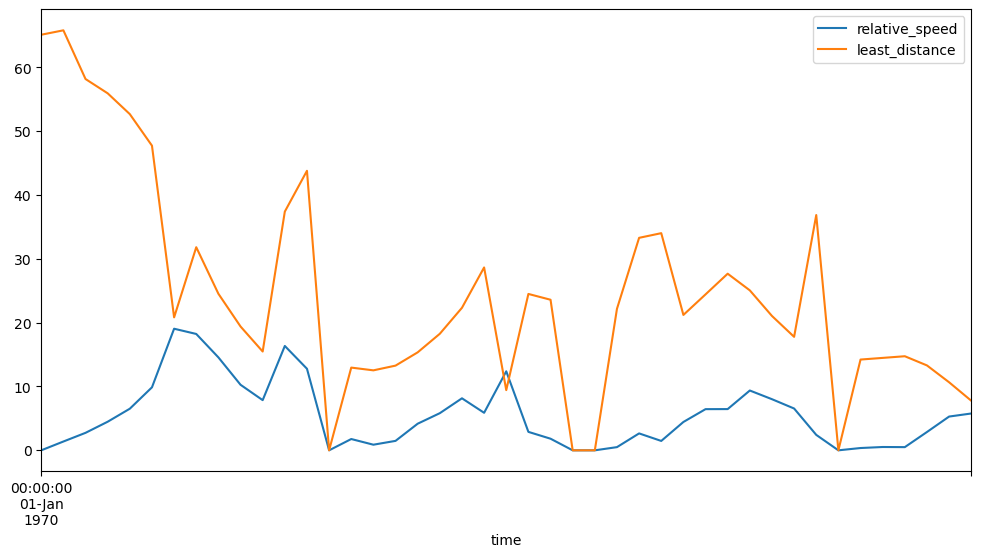

In [9]:
final_data.plot(figsize=(12,6))

In [49]:
train = final_data.iloc[:-10]
test = final_data.iloc[-10:]

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'train' is your 1D array
# Reshape the data to a 2D array with one column
train_reshaped = train.values.reshape(-1, 2)

# Fit the scaler on the reshaped data
scaler.fit(train_reshaped)

# Transform the data using the fitted scaler
scaled_train = scaler.transform(train_reshaped)

In [51]:
train_reshaped.shape

(33, 2)

In [52]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [53]:
# We do the same thing, but now instead for 12 months
n_input = 10
n_features = 2
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense


model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(2))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 150)           91800     
                                                                 
 lstm_7 (LSTM)               (None, 10, 100)           100400    
                                                                 
 lstm_8 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 225052 (879.11 KB)
Trainable params: 225

In [56]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
23/23 [==============================] - 3s 7ms/step - loss: 0.0936
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0534
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0464
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0453
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0470
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0409
Epoch 7/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0425
Epoch 8/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0446
Epoch 9/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0397
Epoch 10/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 11/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0402
Epoch 12/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0405
Epoch 13/50
23/23 [==============================

In [57]:
last_train_batch = scaled_train[-10:]

In [58]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [59]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    print(current_pred)
    print(current_batch)
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 317ms/step
[0.2464265  0.32935742]
[[[0.09553806 0.35851064]
  [0.         0.        ]
  [0.         0.        ]
  [0.02624672 0.33693009]
  [0.13910761 0.50592705]
  [0.07716535 0.51702128]
  [0.23307087 0.32234043]
  [0.33858268 0.3712766 ]
  [0.33910761 0.42051672]
  [0.49186352 0.38085106]]]
1/1 [==============================] - 0s 20ms/step
[0.08625768 0.24644655]
[[[0.         0.        ]
  [0.         0.        ]
  [0.02624672 0.33693009]
  [0.13910761 0.50592705]
  [0.07716535 0.51702128]
  [0.23307087 0.32234043]
  [0.33858268 0.3712766 ]
  [0.33910761 0.42051672]
  [0.49186352 0.38085106]
  [0.24642649 0.32935742]]]
1/1 [==============================] - 0s 16ms/step
[0.05548253 0.21354161]
[[[0.         0.        ]
  [0.02624672 0.33693009]
  [0.13910761 0.50592705]
  [0.07716535 0.51702128]
  [0.23307087 0.32234043]
  [0.33858268 0.3712766 ]
  [0.33910761 0.42051672]
  [0.49186352 0.38085106]
  [0.24642649 0.32935742]
  [0.08625768

In [60]:
test_predictions

[array([0.2464265 , 0.32935742], dtype=float32),
 array([0.08625768, 0.24644655], dtype=float32),
 array([0.05548253, 0.21354161], dtype=float32),
 array([0.05217833, 0.20695007], dtype=float32),
 array([0.04619237, 0.19413596], dtype=float32),
 array([0.0509518 , 0.20595373], dtype=float32),
 array([0.0977537 , 0.25682524], dtype=float32),
 array([0.15257789, 0.29486474], dtype=float32),
 array([0.17321709, 0.3068395 ], dtype=float32),
 array([0.15294035, 0.29532507], dtype=float32)]

In [61]:
test

,relative_speed,least_distance
time,,
1970-01-01 00:00:00.165,8.01,21.05
1970-01-01 00:00:00.170,6.55,17.78
1970-01-01 00:00:00.175,2.42,36.86
1970-01-01 00:00:00.180,0.00,0.00
1970-01-01 00:00:00.185,0.36,14.22
1970-01-01 00:00:00.190,0.52,14.48
1970-01-01 00:00:00.195,0.50,14.74
1970-01-01 00:00:00.200,2.87,13.30
1970-01-01 00:00:00.205,5.29,10.66


In [62]:
true_predictions = scaler.inverse_transform(test_predictions)

In [63]:
test = test.reset_index()

In [64]:
test = test[['relative_speed','least_distance']]

In [65]:
true_predictions = pd.DataFrame(true_predictions)

In [66]:
true_predictions

,0,1
0,4.694425,21.671718
1,1.643209,16.216183
2,1.056942,14.051038
3,0.993997,13.617315
4,0.879965,12.774146
5,0.970632,13.551756
6,1.862208,16.899101
7,2.906609,19.402100
8,3.299786,20.190039
9,2.913514,19.432390


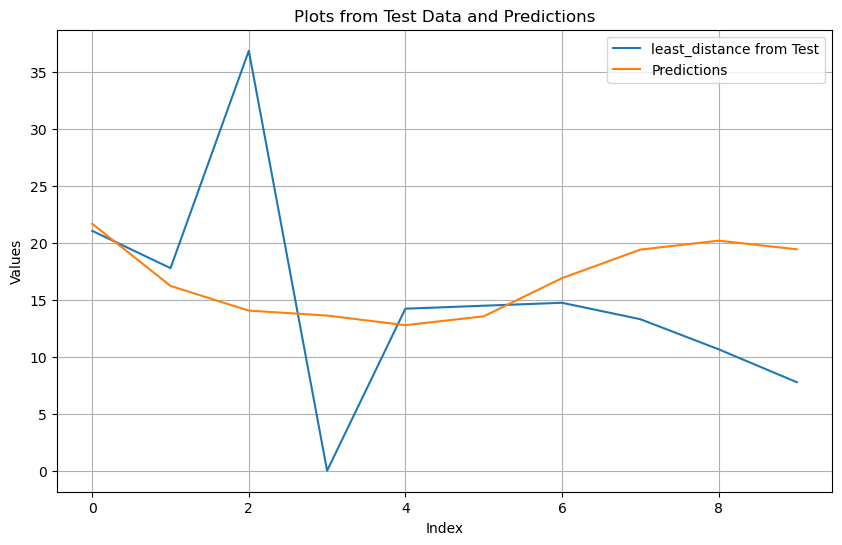

In [67]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting data from 'test'
plt.plot(test['least_distance'], label='least_distance from Test')
# plt.plot(test['Feature2'], label='Feature2 from Test')

# Plotting data from 'true_predictions'
plt.plot(true_predictions[1], label='Predictions')

plt.title('Plots from Test Data and Predictions')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['least_distance'],true_predictions[0]))
print(rmse)
     

15.735259871606315


In [ ]:
import pandas as pd

# Read collision data
collision_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-10/collision_data1.xlsx", header=0, names=["time", "type", "lane", "pos", "collider", "victim", "colliderType", "victimType", "colliderSpeed", "victimSpeed"])

# Read FCD data
fcd_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-10/fcd_data1.xlsx")



In [ ]:
import pandas as pd
import numpy as np

# Assuming 'fcd_df' is your DataFrame

# Group the DataFrame by 'time' and 'lane'
grouped = fcd_df.groupby(['time', 'lane'])

# Create empty columns to store nearest vehicle ID, least distance, and relative speed
fcd_df['nearest_vehicle_id'] = "0"
fcd_df['least_distance'] = 0.0
fcd_df['relative_speed'] = 0.0

for name, group in grouped:
    for index, row in group.iterrows():
        id_pos = row['position']
        id_speed = row['speed']
        other_vehicles = group[group['vehicle_id'] != row['vehicle_id']]  # Excluding the same id from comparison

        # Calculate distance to other vehicles
        other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
        
        if not other_vehicles.empty:
            # Find the row of the nearest vehicle
            min_distance_row = other_vehicles.loc[other_vehicles['distance_to_' + str(row['vehicle_id'])].idxmin()]
            fcd_df.at[index, 'nearest_vehicle_id'] = min_distance_row['vehicle_id']
            fcd_df.at[index, 'least_distance'] = min_distance_row['distance_to_' + str(row['vehicle_id'])]

            # Calculate relative speed
            nearest_vehicle_speed = min_distance_row['speed']
            relative_speed = abs(id_speed - nearest_vehicle_speed)
            fcd_df.at[index, 'relative_speed'] = relative_speed

# Display the updated DataFrame with the columns for nearest 'id', least distance, and relative speed
print(fcd_df)


In [ ]:
fcd_df

In [ ]:
collision_df

In [ ]:
# Sorting the DataFrame by the 'id' column
sorted_data = fcd_df.sort_values(by=['vehicle_id','time'])

In [ ]:
final_data = sorted_data[(sorted_data['vehicle_id'] == 'EGOVEHICLE') & (sorted_data['time'] <= 7.0)]

In [ ]:
final_data

In [ ]:
#Separate dates for future plotting
final_data['time'] = pd.to_datetime(final_data['time']*10000000)
final_data.set_index('time', inplace=True)

train_dates = final_data.index

final_data = final_data[['relative_speed','least_distance']]

In [ ]:
final_data.plot(figsize=(12,6))

In [ ]:
train = final_data.iloc[:-10]
test = final_data.iloc[-10:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'train' is your 1D array
# Reshape the data to a 2D array with one column
train_reshaped = train.values.reshape(-1, 2)

# Fit the scaler on the reshaped data
scaler.fit(train_reshaped)

# Transform the data using the fitted scaler
scaled_train = scaler.transform(train_reshaped)

In [ ]:
# define generator
n_input = 10
n_features = 2
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# fit model
model.fit(generator,epochs=50)

In [ ]:
last_train_batch = scaled_train[-10:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions = pd.DataFrame(true_predictions)

In [ ]:
test = test.reset_index()

In [ ]:
test = test[['relative_speed','least_distance']]

In [ ]:
true_predictions

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting data from 'test'
plt.plot(test['least_distance'], label='least_distance from Test')
# plt.plot(test['Feature2'], label='Feature2 from Test')

# Plotting data from 'true_predictions'
plt.plot(true_predictions[1], label='Predictions')

plt.title('Plots from Test Data and Predictions')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['least_distance'],true_predictions[0]))
print(rmse)
     

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



# Plotting
plt.figure(figsize=(10, 6))

# Plot from first DataFrame
plt.plot(true_predictions[0], label='Value 1')

# # Plot from second DataFrame
# plt.plot(df2['time'], df2['value2'], label='Value 2')

# Adding titles and labels
plt.title('Values Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
train = final_data.iloc[:]
# test = final_data.iloc[-5:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'train' is your 1D array
# Reshape the data to a 2D array with one column
train_reshaped = train.values.reshape(-1, 1)

# Fit the scaler on the reshaped data
scaler.fit(train_reshaped)

# Transform the data using the fitted scaler
scaled_train = scaler.transform(train_reshaped)

In [ ]:
scaled_train[-5:]

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
print(first_eval_batch)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

In [ ]:
test